In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import packages and formatting statements

import numpy as np
from matplotlib import pyplot as plt
import astropy.io.fits as pyfits
from astropy.table import Table, join, Column
from astropy.wcs import WCS
from astropy.io import ascii
import os

plt.rc('text',usetex=False)
fontsize=20
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)

In [3]:
# Compile galaxy and OSC objects
# full catalog header: Name,Type,Host,RA hms,Dec dms,RA dds,Dec dds,DiscDate

DataFile = '../Data/2.MUSESampleCat.csv'
Data = Table.read(DataFile, format='csv') 
# galaxies, MUSEres, MUSENatMaps, MUSE150pcMaps = Data["Galaxy"], Data["MUSERes"], Data["MUSEmapNat"], Data["MUSEmap150pc"]

Data[0:5]

Galaxy,Distance,Incl,Supernova,Type,Ra,Dec,MUSERes,MUSENatMap,MUSE150pcMap,MUSEHII,IRACfiles,Intensity,coptMap,InSample
str7,float64,float64,str11,str12,float64,float64,float64,str71,str70,str50,str40,float64,str58,str4
NGC1087,15.85,42.9,SN1995V,II,41.61152777777777,-0.4987861111111111,0.92,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC1087-0.92asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_150pc/NGC1087-150pc_MAPS.fits,../Data/HII_reg_masks/NGC1087_nebulae_mask_V2.fits,../Data/IRAC/ngc1087_irac1_atGauss4.fits,8.839672735197591e+39,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1087_sfr.fits,True
NGC1300,18.99,31.8,SN2022acko,II,49.91245833333333,-19.39518888888889,0.89,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC1300-0.89asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_150pc/NGC1300-150pc_MAPS.fits,../Data/HII_reg_masks/NGC1300_nebulae_mask_V2.fits,../Data/IRAC/ngc1300_irac1_atGauss4.fits,3.445745101042276e+38,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1300_sfr.fits,True
NGC1365,19.57,55.4,SN1957C,Unclassified,53.38349999999999,-36.11770833333333,1.15,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC1365-1.15asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_150pc/NGC1365-150pc_MAPS.fits,../Data/HII_reg_masks/NGC1365_nebulae_mask_V2.fits,../Data/IRAC/ngc1365_irac1_atGauss4.fits,2.938518960212585e+39,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1365_sfr.fits,True
NGC1365,19.57,55.4,SN1983V,Ic,53.381876388888884,-36.14859166666667,1.15,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC1365-1.15asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_150pc/NGC1365-150pc_MAPS.fits,../Data/HII_reg_masks/NGC1365_nebulae_mask_V2.fits,../Data/IRAC/ngc1365_irac1_atGauss4.fits,1.4845660990817182e+40,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1365_sfr.fits,True
NGC1365,19.57,55.4,SN2001du,II,53.3713125,-36.142111111111106,1.15,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC1365-1.15asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_150pc/NGC1365-150pc_MAPS.fits,../Data/HII_reg_masks/NGC1365_nebulae_mask_V2.fits,../Data/IRAC/ngc1365_irac1_atGauss4.fits,1.3530435354080875e+39,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1365_sfr.fits,True


In [4]:
# isolate discovery year
year = []
for j in range(len(Data)):
    yearDigits = [int(i) for i in Data["Supernova"][j] if i.isdigit()]
    # fix for ASAS-SN14
    if len(yearDigits)<4:
        yearDigits.insert(0,0)
        yearDigits.insert(0,2)
    yearDigits = int(''.join(map(str,yearDigits)))
    year.append(yearDigits)
    
    #flag SNe since 2000
goodSample = np.where(np.asarray(year) > 1999, 1, 0)
goodSample


array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [5]:
#get intensities
intensity = Data["Intensity"]


In [6]:
# homogonize type classifications
SNtype = Data["Type"]
for i in range(len(SNtype)):
    if "II" in SNtype[i]:
        SNtype[i] = "II"
    elif "Ia" in SNtype[i]:
        SNtype[i] = "Ia"
    elif "Ib" or "Ic" in SNtype[i]:
        SNtype[i] = "Ib/c"
    else:
        SNtype[i] = "Unclassified"
print(SNtype)


Type
----
  II
  II
Ib/c
Ib/c
  II
  Ia
  II
 ...
  Ia
  II
Ib/c
Ib/c
  Ia
Ib/c
Ib/c
Length = 33 rows


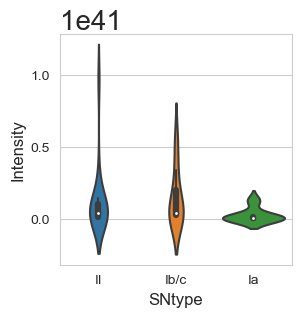

In [7]:
#plot intensities 
inten = np.clip(intensity,0,np.max(intensity))

import seaborn as sns
sns.set_style("whitegrid")
## violinplot for owner
fig = plt.figure(figsize=(3,3))

sns.violinplot(y = inten,
               x = SNtype)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Intensity", fontsize=12)
plt.xlabel("SNtype", fontsize=12)

plt.show()
fig.savefig("../Figures/IntensityViolin.pdf", dpi=300)

In [8]:
!Bug OLD CODE MIGHT NOT NEED

/bin/bash: Bug: command not found


In [9]:
# MEASURE INTENSITY and Build MUSE Catalogue That has all supernovae within PHANGS-MUSE footprint

with open('../Data/2.MUSESNeInt.txt', 'w') as text_file:
    print('#Galaxy,Supernova,Type,Ra,Dec,MUSERes,MUSENatMap,MUSE150pcMap, MUSE150pcInt', file = text_file)

for i in range(len(galaxies)):
    if (MUSE150pcMaps[i] != "" and os.path.isfile(MUSE150pcMaps[i])):
    
        intensity = []
    
        for k in range(len(XXX)):

            xVal = int(round(x_coord[k]))
            yVal = int(round(y_coord[k]))
            if (yVal <= naxis2) and (xVal <= naxis1):
                intensity.append(map[yVal, xVal])

            else: 
                intensity.append(np.nan)


        with open('../Data/2.MUSESNeInt.txt', 'a') as text_file:
            for j in range(len(found_name)):
                print(galaxies[i], ",", found_name[j],",", found_type[j],",", found_ra[j], ",",found_dec[j],
                      ",", MUSEres[i],",", MUSENatMaps[i],",", MUSE150pcMaps[i],",", intensity[j], file = text_file)


NameError: name 'galaxies' is not defined

In [ ]:
# Turn files into data structure and clean

MUSEdataFile = '../Data/2.MUSESNeInt.txt'
database = Table.read(MUSEdataFile, format='ascii') 
database[0:2]